In [180]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Dropout ,LeakyReLU
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score, classification_report , f1_score

In [181]:
#1. Load the features and labels CSV
df = pd.read_csv("ravdess_features.csv")

# 2. Check the content of the CSV (IMPORTANT DEBUG STEP)
print("📊 Shape of the DataFrame:", df.shape)
print(df.head())

# Stop and warn if it's empty
if df.shape[0] == 0:
    raise ValueError("The CSV file is empty. Check your preprocessing step.")

# 3. Separate features and labels
X = df.drop("label", axis=1)
y = df["label"]

# 4. Encode string labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 5. 80-20 train-validation split with stratification
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"✅ Training samples: {len(X_train)}, Validation samples: {len(X_val)}")

#Scaling the validation and training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


📊 Shape of the DataFrame: (2452, 61)
            0          1          2         3          4          5  \
0 -570.000305  29.231855 -28.572050 -1.171939  -8.968902 -10.660740   
1 -542.260498  33.782990  -3.803622  3.091985  -9.681706  -6.023739   
2 -687.706604  39.088589  -5.860187  6.923982 -10.534793  -5.880984   
3 -550.819153  37.232449  -5.966861  4.732355  -2.008578  -9.404682   
4 -573.296753  45.841038  -9.815438  4.286420  -8.331691  -3.489434   

           6          7          8         9  ...        51         52  \
0 -13.617955 -19.157396  -4.766867 -3.655524  ...  0.497664  12.476468   
1  -8.644806 -11.424565 -11.615021 -1.289250  ...  0.424412  18.173931   
2  -6.757151  -8.113562  -3.685668 -5.643714  ...  0.371718  16.162948   
3 -14.451254 -14.265596  -8.414461  0.758800  ...  0.399976  16.634672   
4  -5.228768 -11.024238  -5.628939 -1.996801  ...  0.484061  15.979445   

          53         54         55         56         57         58        59  \
0  19.2261

In [182]:
model = Sequential([
    Dense(256 , activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(128 , activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(64 , activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    Dense(8 , activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#dont know what 
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

model.fit(X_train_scaled,y_train,epochs=25,batch_size=32,validation_split=0.2,class_weight=class_weights)

NameError: name 'LeakyReLu' is not defined

In [170]:

# Predict probabilities for a batch of inputs
y_pred_probs = model.predict(X_val_scaled)   # shape: (num_samples, num_classes)

# Get predicted class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Accuracy and report
print("Accuracy:", accuracy_score(y_val, y_pred_labels))
print(classification_report(y_val, y_pred_labels))
#f1_score 
print("Weighted F1 Score:", f1_score(y_val,y_pred_labels,average='weighted'))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy: 0.714867617107943
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        75
           1       0.71      0.83      0.77        75
           2       0.51      0.72      0.60        39
           3       0.77      0.61      0.68        75
           4       0.75      0.67      0.70        75
           5       0.74      0.74      0.74        38
           6       0.77      0.63      0.69        75
           7       0.56      0.82      0.67        39

    accuracy                           0.71       491
   macro avg       0.71      0.72      0.71       491
weighted avg       0.73      0.71      0.72       491

Weighted F1 Score: 0.7171279540404335


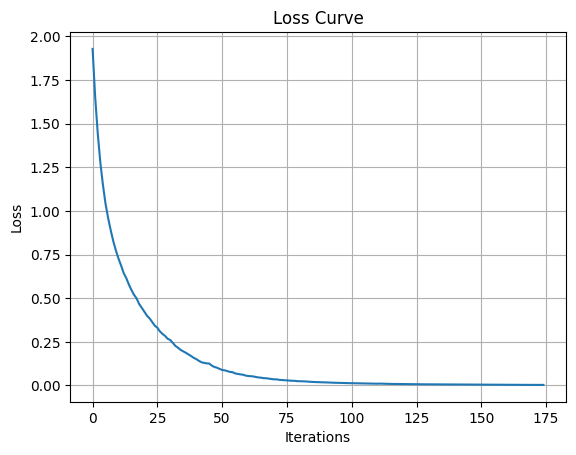

Accuracy: 0.7861507128309573
F1 Score: 0.7883331766558901

Classification Report:
               precision    recall  f1-score   support

       angry       0.88      0.85      0.86        75
        calm       0.83      0.83      0.83        75
     disgust       0.65      0.72      0.68        39
     fearful       0.85      0.77      0.81        75
       happy       0.87      0.79      0.83        75
     neutral       0.62      0.76      0.68        38
         sad       0.76      0.77      0.77        75
   surprised       0.68      0.72      0.70        39

    accuracy                           0.79       491
   macro avg       0.77      0.78      0.77       491
weighted avg       0.79      0.79      0.79       491

Fitting 7 folds for each of 200 candidates, totalling 1400 fits
Accuracy: 0.769857433808554
F1 Score: 0.7706103850994752

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85        75
           

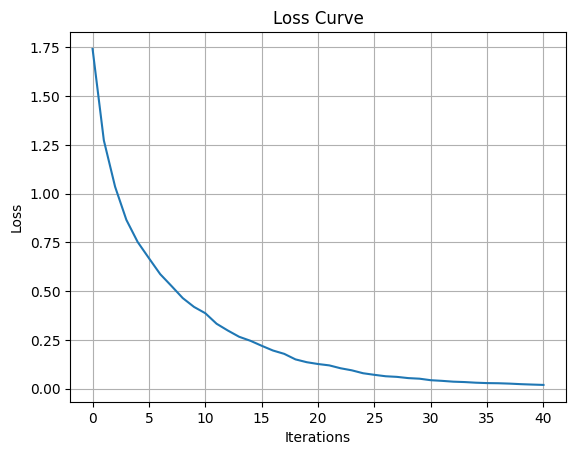

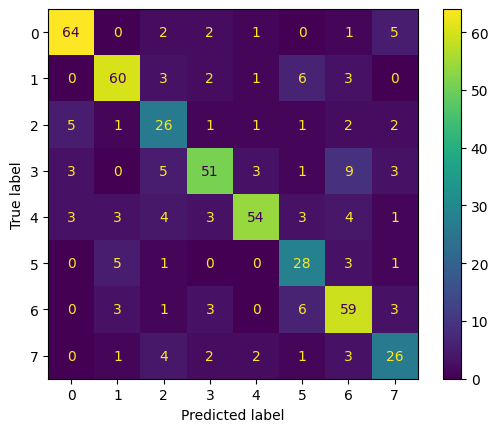

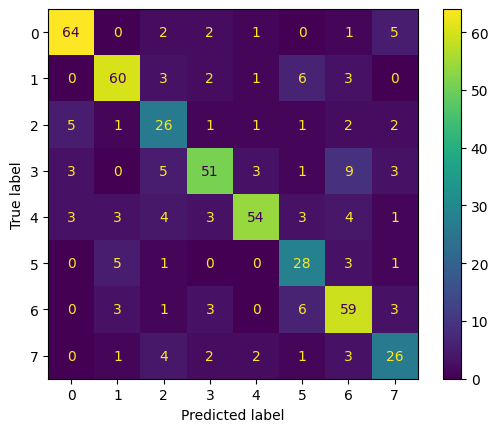

In [183]:
#jiyas code 
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize and train MLP
mlp = MLPClassifier(hidden_layer_sizes=(256, 64), max_iter=500, random_state=7)
mlp.fit(X_train_scaled, y_train)

import matplotlib.pyplot as plt

plt.plot(mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# Predict
y_pred = mlp.predict(X_val_scaled)

# Print metrics
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_val, y_pred, target_names=le.classes_))
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, make_scorer
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold


# 1. Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('mlp', MLPClassifier(max_iter=1500, early_stopping=True, random_state=42))
])

#2. Define parameter grid (prefix with 'mlp__')
param_grid = {
    'mlp__hidden_layer_sizes': [(512, 256), (256, 128), (128, 64), (512, 512), (256, 256, 128)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [0.0001, 0.0005, 0.001],
    'mlp__alpha': [1e-5, 5e-5, 1e-4, 5e-4, 1e-3],
    'mlp__learning_rate': ['constant', 'adaptive'],
    'mlp__max_iter': [1500, 2000],
    'mlp__early_stopping': [True]
}

# # For adam (no momentum)
# param_grid_adam = {
#     'mlp__hidden_layer_sizes': [(512, 256, 128), (256, 128, 64)],
#     'mlp__activation': ['relu', 'tanh'],
#     'mlp__alpha': [1e-5, 5e-5, 1e-4],
#     'mlp__learning_rate': ['constant', 'adaptive'],
#     'mlp__solver': ['adam'],
#     'mlp__max_iter': [3000]
# }

# # For sgd (momentum included)
# param_grid_sgd = {
#     'mlp__hidden_layer_sizes': [(512, 256, 128), (256, 128, 64)],
#     'mlp__activation': ['relu', 'tanh'],
#     'mlp__alpha': [1e-5, 5e-5, 1e-4],
#     'mlp__learning_rate': ['constant', 'adaptive'],
#     'mlp__solver': ['sgd'],
#     'mlp__momentum': [0.9, 0.95],
#     'mlp__max_iter': [3000]
# }



# 3. Scoring
f1_scorer = make_scorer(f1_score, average='weighted')



cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)



from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(random_state=42))
])

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipe, param_grid, cv=7, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


# 4. GridSearchCV
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=cv,
    verbose=2,
    n_jobs=-1
)

from sklearn.metrics import accuracy_score, f1_score, classification_report

y_pred = grid_search.best_estimator_.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_val, y_pred))


# 5. Fit
grid.fit(X_train, y_train)  # No need to manually scale or resample


# 6. Results
print("Best Parameters:", grid.best_params_)
print("Best Weighted F1 Score (CV):", grid.best_score_)

# 7. Predict on validation set
y_pred = grid.predict(X_val)

print("\nValidation Set Classification Report:\n")
print(classification_report(y_val, y_pred, target_names=le.classes_))

print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Validation Weighted F1 Score:", f1_score(y_val, y_pred, average='weighted'))

# 8. Loss curve (optional)
best_mlp = grid.best_estimator_.named_steps['mlp']
plt.plot(best_mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
ConfusionMatrixDisplay(cm).plot()
# import joblib
# joblib.dump(grid_search.best_estimator_, "best_mlp_model.pkl")

